In [ ]:
!pip install -q torch torchvision matplotlib

In [ ]:
# Standard library imports
from os.path import join
from collections import OrderedDict
from array import array

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import random
import networkx as nx
import pickle
import copy
from tqdm import tqdm

# Type hinting imports
from typing import Callable, Dict, List, Optional, Tuple, Any  # For type annotations

# Google Colab specific imports
from google.colab import drive
drive.mount('/content/drive')

# PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, Subset, ConcatDataset

# torchvision imports
import torchvision.transforms as transforms  # For image transformations

# Device setup
DEVICE = torch.device("cpu")  # Try "cuda" to train on GPU
print(
    f"Training on {DEVICE} using PyTorch {torch.__version__}"
)

Mounted at /content/drive
Training on cpu using PyTorch 2.3.1+cu121


# Data Loaders

## Custom Dataset

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, idx):
        x = torch.tensor(self.X_data[idx], dtype=torch.float32)
        y = torch.tensor(self.y_data[idx], dtype=torch.long)
        return x, y


## Extended MNIST

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/emnist/train_iid_loaders.pkl', 'rb') as f:
    emnist_train_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/emnist/test_iid_loaders.pkl', 'rb') as f:
    emnist_test_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/emnist/train_non_iid_loaders.pkl', 'rb') as f:
    emnist_train_non_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/emnist/test_non_iid_loaders.pkl', 'rb') as f:
    emnist_test_non_iid_loaders = pickle.load(f)

In [ ]:
emnist_train_iid_loaders[0].dataset[0][0].shape, len(emnist_train_iid_loaders)

(torch.Size([1, 28, 28]), 20)

In [ ]:
emnist_test_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in emnist_test_iid_loaders]), batch_size=32, shuffle=False)
emnist_test_non_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in emnist_test_non_iid_loaders]), batch_size=32, shuffle=False)

## CIFAR 10

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/cifar10/train_iid_loaders.pkl', 'rb') as f:
    cifar10_train_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/cifar10/test_iid_loaders.pkl', 'rb') as f:
    cifar10_test_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/cifar10/train_non_iid_loaders.pkl', 'rb') as f:
    cifar10_train_non_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/cifar10/test_non_iid_loaders.pkl', 'rb') as f:
    cifar10_test_non_iid_loaders = pickle.load(f)

In [ ]:
cifar10_train_iid_loaders[0].dataset[0][0].shape

In [ ]:
cifar10_test_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in cifar10_test_iid_loaders]), batch_size=32, shuffle=False)
cifar10_test_non_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in cifar10_test_non_iid_loaders]), batch_size=32, shuffle=False)

## Fashion Mnist

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/fashion-mnist/train_iid_loaders.pkl', 'rb') as f:
    fashion_mnist_train_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/fashion-mnist/test_iid_loaders.pkl', 'rb') as f:
    fashion_mnist_test_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/fashion-mnist/train_non_iid_loaders.pkl', 'rb') as f:
    fashion_mnist_train_non_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/fashion-mnist/test_non_iid_loaders.pkl', 'rb') as f:
    fashion_mnist_test_non_iid_loaders = pickle.load(f)

In [ ]:
fashion_mnist_train_iid_loaders[0].dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
fashion_mnist_test_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in fashion_mnist_test_iid_loaders]), batch_size=32, shuffle=False)
fashion_mnist_test_non_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in fashion_mnist_test_non_iid_loaders]), batch_size=32, shuffle=False)

## MNIST

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/mnist/train_iid_loaders.pkl', 'rb') as f:
    mnist_train_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/mnist/test_iid_loaders.pkl', 'rb') as f:
    mnist_test_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/mnist/train_non_iid_loaders.pkl', 'rb') as f:
    mnist_train_non_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/mnist/test_non_iid_loaders.pkl', 'rb') as f:
    mnist_test_non_iid_loaders = pickle.load(f)

In [ ]:
mnist_train_iid_loaders[0].dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
mnist_test_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in mnist_test_iid_loaders]), batch_size=32, shuffle=False)
mnist_test_non_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in mnist_test_non_iid_loaders]), batch_size=32, shuffle=False)

## Medical MNIST

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/medical-mnist/train_iid_loaders.pkl', 'rb') as f:
    medical_mnist_train_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/medical-mnist/test_iid_loaders.pkl', 'rb') as f:
    medical_mnist_test_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/medical-mnist/train_non_iid_loaders.pkl', 'rb') as f:
    medical_mnist_train_non_iid_loaders = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/data/medical-mnist/test_non_iid_loaders.pkl', 'rb') as f:
    medical_mnist_test_non_iid_loaders = pickle.load(f)

In [ ]:
medical_mnist_train_iid_loaders[0].dataset[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
medical_mnist_test_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in medical_mnist_test_iid_loaders]), batch_size=32, shuffle=False)
medical_mnist_test_non_iid_loader = DataLoader(ConcatDataset([loader.dataset for loader in medical_mnist_test_non_iid_loaders]), batch_size=32, shuffle=False)

# CNN

In [ ]:
def train(net, trainloader, epochs):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    for _ in range(epochs):
        for images, labels in trainloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            loss = criterion(net(images), labels)
            loss.backward()
            optimizer.step()

def test(net, testloader):
    """Validate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(DEVICE), data[1].to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return loss, accuracy

# [1, 28, 28] -> 10
class NetA(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)        # 1 input channel (grayscale), 10 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(10, 32, 5)       # 10 input channels, 32 output channels, 5x5 kernel
        self.conv3 = nn.Conv2d(32, 64, 3)       # 32 input channels, 64 output channels, 3x3 kernel
        self.pool  = nn.MaxPool2d(2, 2)         # 2x2 pooling layer
        self.fc1   = nn.Linear(256, 128)        # Dense layer
        self.fc2   = nn.Linear(128, 64)         # Dense layer
        self.fc3   = nn.Linear(64, 10)          # 64 inputs, 10 outputs for the 10 classes
        # Steps:
            # Conv1: 28x28 -> 24x24 (28 - 5 + 1)
            # Pool:  24x24 -> 12x12 (24 / 2)
            # Conv2: 12x12 -> 8x8   (12 - 5 + 1)
            # Pool:  8x8   -> 4x4   (8 / 2)
            # Conv3: 4x4   -> 2x2   (4 - 3 + 1)
            # Flatn: 2x2   -> 1x256 (2 * 2 * 64)
            # Dense: 1x256 -> 1x128
            # Dense: 1x128 -> 1x64
            # Dense: 1x64  -> 1x10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # (12, 12, 10)
        x = self.pool(F.relu(self.conv2(x))) # (4, 4, 32)
        x = F.relu(self.conv3(x))            # (2, 2, 64)
        x = x.view(-1, 256)                  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# [3, 32, 32] -> 10
class NetB(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# [1, 32, 32] -> 6
class NetC(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Topology

In [ ]:
num_nodes = 20

## Mesh

In [ ]:
def create_mesh_topology(num_nodes, connection_prob):
    G = nx.Graph()

    G.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < connection_prob:
                G.add_edge(i, j)

    return G

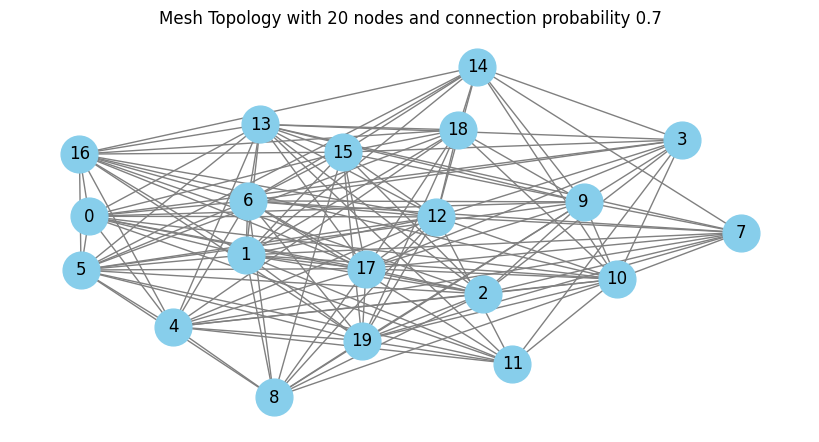

In [ ]:
G_Mesh_07 = create_mesh_topology(num_nodes, 0.7)

plt.figure(figsize=(8, 4))
nx.draw(G_Mesh_07, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Mesh Topology with {num_nodes} nodes and connection probability {0.7}')
plt.show()

In [ ]:
G_Mesh_05 = create_mesh_topology(num_nodes, 0.5)

plt.figure(figsize=(8, 4))
nx.draw(G_Mesh_05, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Mesh Topology with {num_nodes} nodes and connection probability {0.5}')
plt.show()

In [ ]:
G_Mesh_09 = create_mesh_topology(num_nodes, 0.9)

plt.figure(figsize=(8, 4))
nx.draw(G_Mesh_09, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Mesh Topology with {num_nodes} nodes and connection probability {0.9}')
plt.show()

## Line Topology

In [ ]:
def create_line_topology(num_clients):
    G = nx.path_graph(num_clients)
    return G

G_Line = create_line_topology(num_nodes)

plt.figure(figsize=(8, 4))
nx.draw(G_Line, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Line Topology with {num_nodes} nodes')
plt.show()

## Ring Topology

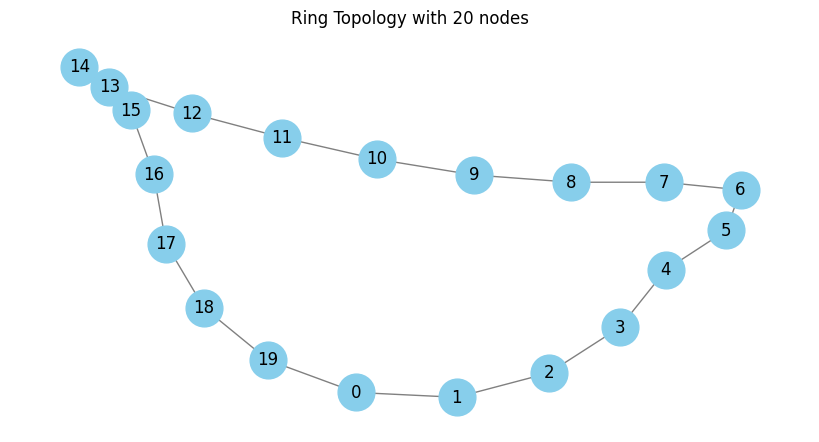

In [ ]:
def create_ring_topology(num_clients):
    G = nx.cycle_graph(num_clients)
    return G

G_Ring = create_ring_topology(num_nodes)

plt.figure(figsize=(8, 4))
nx.draw(G_Ring, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Ring Topology with {num_nodes} nodes')
plt.show()

## Star Topology

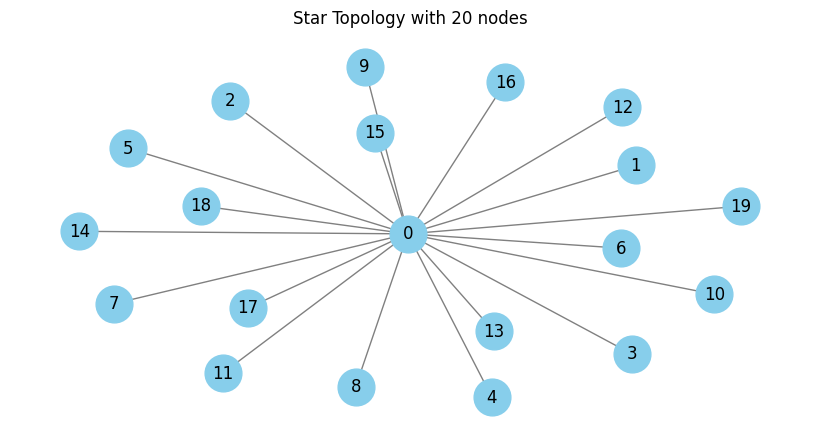

In [ ]:
def create_star_topology(num_clients):
    G = nx.star_graph(num_clients - 1)
    return G

G_Star = create_star_topology(num_nodes)

plt.figure(figsize=(8, 4))
nx.draw(G_Star, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Star Topology with {num_nodes} nodes')
plt.show()

## Tree Topology

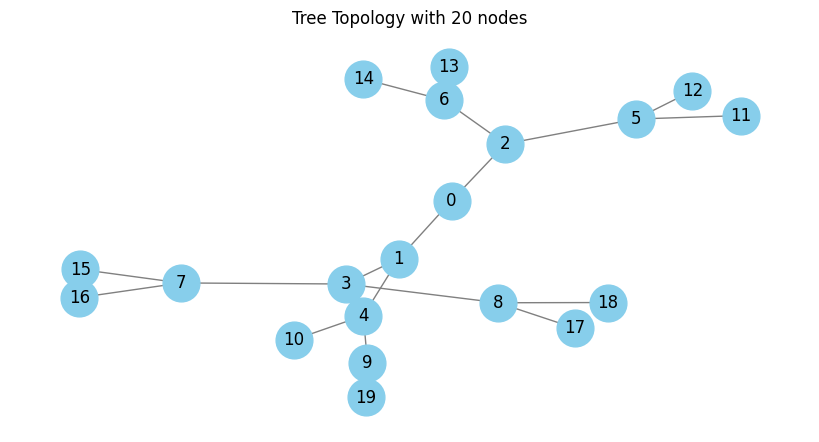

In [ ]:
def create_tree_topology(num_clients, branching_factor=2):
    G = nx.DiGraph()  # Directed graph to represent the tree structure

    # Initialize the tree with the root node
    G.add_node(0)
    current_node = 0
    next_node = 1

    # Iterate through each level of the tree
    while next_node < num_clients:
        children = []

        # Add children to the current node
        for _ in range(branching_factor):
            if next_node < num_clients:
                G.add_node(next_node)
                G.add_edge(current_node, next_node)
                children.append(next_node)
                next_node += 1
            else:
                break

        # Move to the next node in the tree
        current_node += 1

    # Convert to an undirected graph for general usage in decentralized FL
    G = G.to_undirected()

    return G

G_Tree = create_tree_topology(num_nodes)

plt.figure(figsize=(8, 4))
nx.draw(G_Tree, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Tree Topology with {num_nodes} nodes')
plt.show()

## Hybrid Topology

In [ ]:
def create_hybrid_topology(num_clients):
    G = nx.Graph()

    # Create a ring topology for half of the clients
    ring = nx.cycle_graph(num_clients // 2)
    G = nx.compose(G, ring)

    # Create a star topology for the other half
    star = nx.star_graph(num_clients // 2 - 1)

    # Relabel the star graph to avoid overlapping nodes with the ring
    star = nx.relabel_nodes(star, lambda x: x + (num_clients // 2))
    G = nx.compose(G, star)

    # Connect the two topologies
    G.add_edge(0, num_clients // 2)

    return G

G_Hybrid = create_hybrid_topology(num_nodes)

plt.figure(figsize=(8, 4))
nx.draw(G_Hybrid, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title(f'Hybrid Topology with {num_nodes} nodes')
plt.show()

# Start Simulation

In [ ]:
NUM_ROUNDS = 150  # Number of communication rounds


## Method A

In [ ]:
def run_experiment_methodA(G, Net, train_loaders, test_loaders, combined_test_loader, experiment_name, topology_name):
    """Perform decentralized federated learning and evaluate performance."""
    num_clients = len(train_loaders)  # Assuming train_loaders is a list of loaders for each client

    # Initialize the network for each client
    nets = [Net().to(DEVICE) for _ in range(num_clients)]

    # Parameters for plotting and recording accuracy
    accuracy_history = np.zeros((num_clients, NUM_ROUNDS))

    # Decentralized Federated Learning
    for round_num in tqdm(range(NUM_ROUNDS), desc=f"Training Rounds - {experiment_name} - {topology_name}"):
        new_nets = [copy.deepcopy(net) for net in nets]  # Deep copy the models to avoid in-place modifications

        for client in range(num_clients):
            # Train on local data
            train(nets[client], train_loaders[client], epochs=1)

            # Get neighbors' models (including itself)
            neighbors = list(G.neighbors(client)) + [client]
            neighbor_models = [nets[n].state_dict() for n in neighbors]

            # Aggregate the model parameters (take the average)
            averaged_state_dict = neighbor_models[0]
            for key in averaged_state_dict:
                averaged_state_dict[key] = torch.stack([neighbor_model[key] for neighbor_model in neighbor_models], 0).mean(0)

            # Update the new model with the averaged parameters
            new_nets[client].load_state_dict(averaged_state_dict)

            # Evaluate the model and store accuracy
            _, accuracy = test(nets[client], test_loaders[client])
            accuracy_history[client, round_num] = accuracy

        # Update all models
        nets = new_nets

    # Compute the average model parameters
    average_state_dict = nets[0].state_dict()
    for key in average_state_dict:
        average_state_dict[key] = torch.stack([net.state_dict()[key] for net in nets], 0).mean(0)

    # Load average parameters into a new model
    average_model = Net().to(DEVICE)
    average_model.load_state_dict(average_state_dict)

    # Test the average model on the combined test dataset
    _, average_accuracy = test(average_model, combined_test_loader)
    print(f'Average model accuracy on combined test dataset for {experiment_name} - {topology_name}: {average_accuracy:.4f}')

    # Plot accuracy over rounds
    plt.figure(figsize=(10, 5))
    for client in range(num_clients):
        plt.plot(accuracy_history[client], label=f'Client {client}')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Client Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodA_{experiment_name}_{topology_name}_accuracy.png')
    plt.show()

    # Save accuracy to CSV
    df = pd.DataFrame(accuracy_history.T, columns=[f'Client {i}' for i in range(num_clients)])
    df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodA_{experiment_name}_{topology_name}_accuracy.csv', index_label='Round')


Training Rounds - emnist_iid - G_Tree: 100%|██████████| 150/150 [1:20:12<00:00, 32.08s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Tree: 0.9880


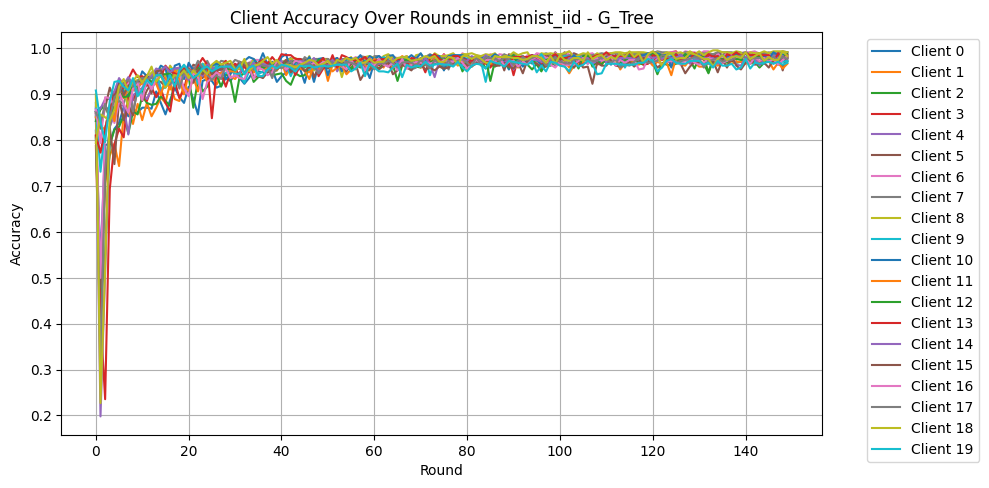

Training Rounds - emnist_iid - G_Star: 100%|██████████| 150/150 [1:19:40<00:00, 31.87s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Star: 0.9901


Training Rounds - emnist_non_iid - G_Mesh_05: 100%|██████████| 150/150 [21:44<00:00,  8.70s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Mesh_05: 0.1462


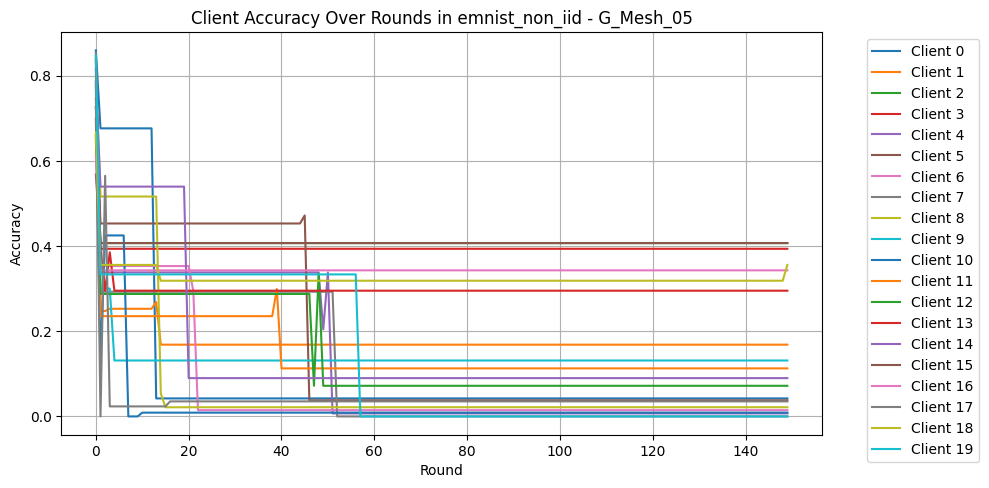

Training Rounds - emnist_non_iid - G_Ring: 100%|██████████| 150/150 [21:39<00:00,  8.67s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Ring: 0.9603


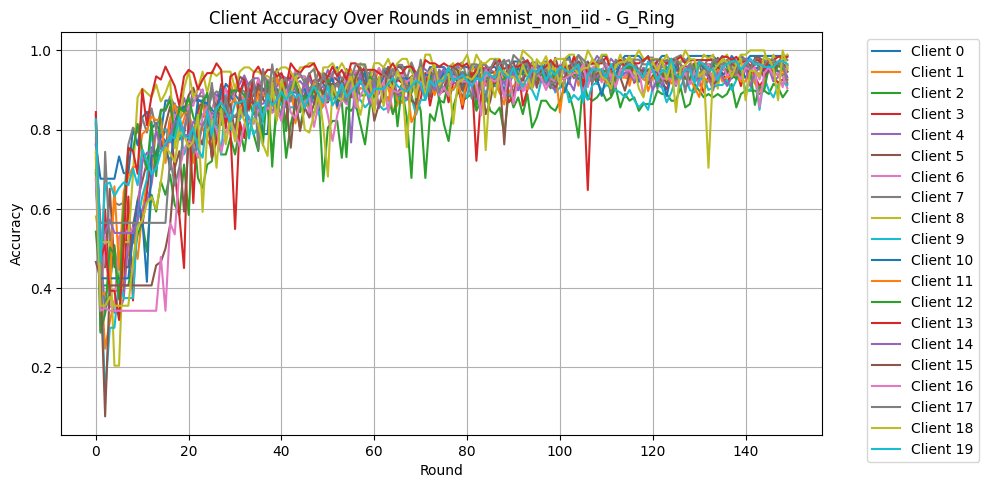

Training Rounds - emnist_non_iid - G_Line: 100%|██████████| 150/150 [21:43<00:00,  8.69s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Line: 0.9488


Training Rounds - emnist_non_iid - G_Tree: 100%|██████████| 150/150 [21:43<00:00,  8.69s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Tree: 0.9546


Training Rounds - emnist_non_iid - G_Star: 100%|██████████| 150/150 [21:49<00:00,  8.73s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Star: 0.9481


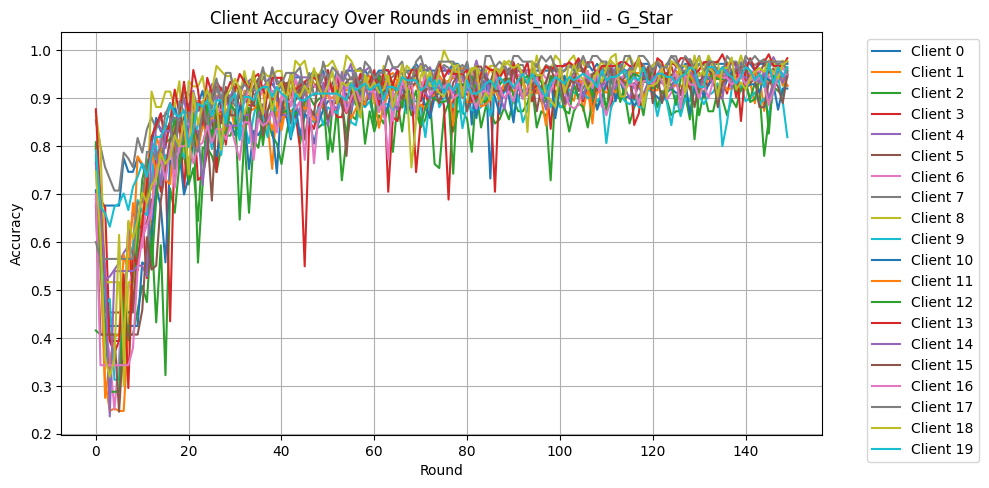

In [ ]:
# Define your experiments
experiments = [
    {
        'train_loaders': emnist_train_iid_loaders,
        'test_loaders': emnist_test_iid_loaders,
        'combined_test_loader': emnist_test_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_iid'
    },
    {
        'train_loaders': emnist_train_non_iid_loaders,
        'test_loaders': emnist_test_non_iid_loaders,
        'combined_test_loader': emnist_test_non_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_non_iid'
    },
    # {
    #     'train_loaders': mnist_train_iid_loaders,
    #     'test_loaders': mnist_test_iid_loaders,
    #     'combined_test_loader': mnist_test_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'mnist_iid'
    # },
    # {
    #     'train_loaders': mnist_train_non_iid_loaders,
    #     'test_loaders': mnist_test_non_iid_loaders,
    #     'combined_test_loader': mnist_test_non_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'mnist_non_iid'
    # }
]

# Network topologies
# topologies = [G_Tree, G_Star, G_Hybrid]
topologies = [G_Mesh_05, G_Ring, G_Line, G_Tree, G_Star]
topology_names = ["G_Mesh_05", "G_Ring", "G_Line", "G_Tree", "G_Star"]

# Run all experiments
for experiment in experiments:
    for i in range(len(topologies)):
        topology = topologies[i]
        topology_name = topology_names[i]
        if experiment.get('experiment_name') == 'emnist_iid' and i < 3:
            continue  # Skip this combination
        run_experiment_methodA(
            G=topology,
            Net=experiment['Net'],
            train_loaders=experiment['train_loaders'],
            test_loaders=experiment['test_loaders'],
            combined_test_loader=experiment['combined_test_loader'],
            experiment_name=experiment['experiment_name'],
            topology_name=topology_name  # Convert topology object to string if needed
        )

Training Rounds - emnist_non_iid - G_Star: 100%|██████████| 150/150 [23:14<00:00,  9.30s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Star: 0.9523


Training Rounds - emnist_non_iid - G_Hybrid: 100%|██████████| 150/150 [23:32<00:00,  9.42s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Hybrid: 0.9580


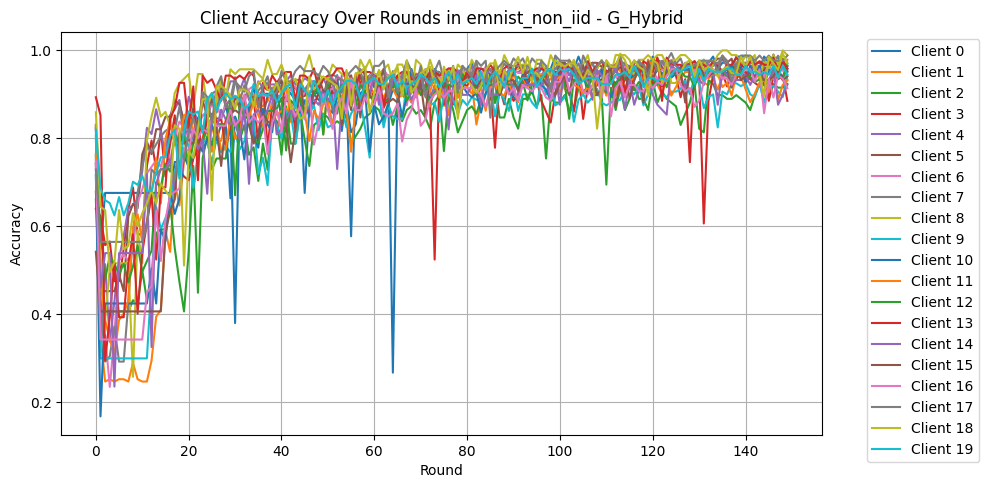

In [ ]:
# Define your experiments
experiments = [
    # {
    #     'train_loaders': emnist_train_iid_loaders,
    #     'test_loaders': emnist_test_iid_loaders,
    #     'combined_test_loader': emnist_test_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'emnist_iid'
    # },
    {
        'train_loaders': emnist_train_non_iid_loaders,
        'test_loaders': emnist_test_non_iid_loaders,
        'combined_test_loader': emnist_test_non_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_non_iid'
    },
    # {
    #     'train_loaders': mnist_train_iid_loaders,
    #     'test_loaders': mnist_test_iid_loaders,
    #     'combined_test_loader': mnist_test_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'mnist_iid'
    # },
    # {
    #     'train_loaders': mnist_train_non_iid_loaders,
    #     'test_loaders': mnist_test_non_iid_loaders,
    #     'combined_test_loader': mnist_test_non_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'mnist_non_iid'
    # }
]

# Network topologies
# topologies = [G_Tree, G_Star, G_Hybrid]
topologies = [G_Mesh_07, G_Mesh_05, G_Mesh_09, G_Ring, G_Line, G_Tree, G_Star, G_Hybrid]
topology_names = ["G_Mesh_07", "G_Mesh_05", "G_Mesh_09", "G_Ring", "G_Line", "G_Tree", "G_Star", "G_Hybrid"]

# Run all experiments
for experiment in experiments:
    for i in range(len(topologies)):
        topology = topologies[i]
        topology_name = topology_names[i]
        if experiment.get('experiment_name') == 'emnist_non_iid' and i < 6:
            continue  # Skip this combination
        run_experiment_methodA(
            G=topology,
            Net=experiment['Net'],
            train_loaders=experiment['train_loaders'],
            test_loaders=experiment['test_loaders'],
            combined_test_loader=experiment['combined_test_loader'],
            experiment_name=experiment['experiment_name'],
            topology_name=topology_name  # Convert topology object to string if needed
        )

## Method B

In [ ]:
def run_experiment_methodB(
    G, Net, train_loaders, test_loaders, combined_test_loader, experiment_name, topology_name, p
):
    """Perform decentralized federated learning using Method B for client selection."""
    num_clients = len(train_loaders)  # Assuming train_loaders is a list of loaders for each client
    nets = [Net().to(DEVICE) for _ in range(num_clients)]

    accuracy_history = np.zeros((num_clients, NUM_ROUNDS))
    selected_clients_history = []
    selected_clients_df = pd.DataFrame()
    probability_df = pd.DataFrame()
    accuracy_df = pd.DataFrame()
    accuracies = []

    for round_num in tqdm(range(NUM_ROUNDS), desc=f"Training Rounds - {experiment_name} - {topology_name}"):
        sample_size = int(p * num_clients)
        new_nets = [copy.deepcopy(net) for net in nets]

        if round_num == 0:
            selected_clients = np.random.choice(range(num_clients), size=sample_size, replace=False).tolist()
            round_probabilities = {f"Client {cid + 1}": p for cid in range(num_clients)}
            # Initialize the accuracy history for the first round
            accuracy_history[:, round_num] = [test(net, test_loaders[client])[1] for client, net in enumerate(nets)]
        else:
            round_probabilities = {}
            selected_clients = []

            for client in range(num_clients):
                if client in selected_clients_history[-1]:
                    last_round_accuracy = accuracy_history[client, round_num - 1]
                    prob = np.exp(-1.5 * last_round_accuracy)
                else:
                    prob = p

                round_probabilities[f"Client {client + 1}"] = prob

                if np.random.rand() < prob:
                    selected_clients.append(client)

            if not selected_clients:
                selected_clients.append(np.random.randint(num_clients))

        selected_clients_history.append(selected_clients)

        for client in selected_clients:
            train(nets[client], train_loaders[client], epochs=1)
            neighbors = list(G.neighbors(client)) + [client]
            neighbor_models = [nets[n].state_dict() for n in neighbors]

            averaged_state_dict = neighbor_models[0]
            for key in averaged_state_dict:
                averaged_state_dict[key] = torch.stack([neighbor_model[key] for neighbor_model in neighbor_models], 0).mean(0)

            new_nets[client].load_state_dict(averaged_state_dict)
            _, accuracy = test(nets[client], test_loaders[client])
            accuracy_history[client, round_num] = accuracy

        nets = new_nets
        prob_df = pd.DataFrame(round_probabilities, index=[round_num + 1])
        probability_df = pd.concat([probability_df, prob_df])

        # Replace zeros in round_accuracies with the previous round's accuracy
        round_accuracies = accuracy_history[:, round_num]
        if round_num > 0:
            previous_round_accuracies = accuracy_history[:, round_num - 1]
            round_accuracies[round_accuracies == 0] = previous_round_accuracies[round_accuracies == 0]

        # Record the corrected accuracies for this round
        round_df = pd.DataFrame({f"Client {i + 1}": round_accuracies[i] for i in range(num_clients)}, index=[round_num + 1])
        accuracy_df = pd.concat([accuracy_df, round_df])

        # Calculate and record the average accuracy for this round
        average_accuracy = np.nanmean(round_accuracies)
        accuracies.append(average_accuracy)

        # Record selected clients for this round
        selected_dict = {f'Client {i + 1}': 1 if i in selected_clients else 0 for i in range(num_clients)}
        selected_clients_df = pd.concat([selected_clients_df, pd.DataFrame(selected_dict, index=[round_num + 1])])

    # Plot accuracy curves for each client
    plt.figure(figsize=(15, 8))
    for client_cid in range(num_clients):
        plt.plot(range(1, NUM_ROUNDS + 1), accuracy_history[client_cid], marker='o', label=f'Client {client_cid + 1}')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Client Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/{experiment_name}_{topology_name}_client_accuracy.png')
    plt.show()

    # Plot average accuracy curve
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, NUM_ROUNDS + 1), accuracies, marker='o')
    plt.xlabel('Round')
    plt.ylabel('Average Accuracy')
    plt.title(f'Average Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/{experiment_name}_{topology_name}_average_accuracy.png')
    plt.show()

    # Save accuracy matrix
    accuracy_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/{experiment_name}_{topology_name}_accuracy_matrix.csv', index_label='Round')

    # Save probability and availability matrices
    probability_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/{experiment_name}_{topology_name}_probabilities.csv', index_label='Round')

    # Save selected clients history to CSV
    selected_clients_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/{experiment_name}_{topology_name}_selected_clients.csv', index_label='Round')

    # Print final average accuracy
    final_average_accuracy = np.nanmean(accuracies)
    print(f'Average model accuracy on combined test dataset for {experiment_name} - {topology_name}: {final_average_accuracy:.4f}')


Training Rounds - emnist_non_iid - G_Mesh_05: 100%|██████████| 150/150 [15:09<00:00,  6.06s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Mesh_05: 0.2731


Training Rounds - emnist_non_iid - G_Ring: 100%|██████████| 150/150 [09:56<00:00,  3.98s/it]


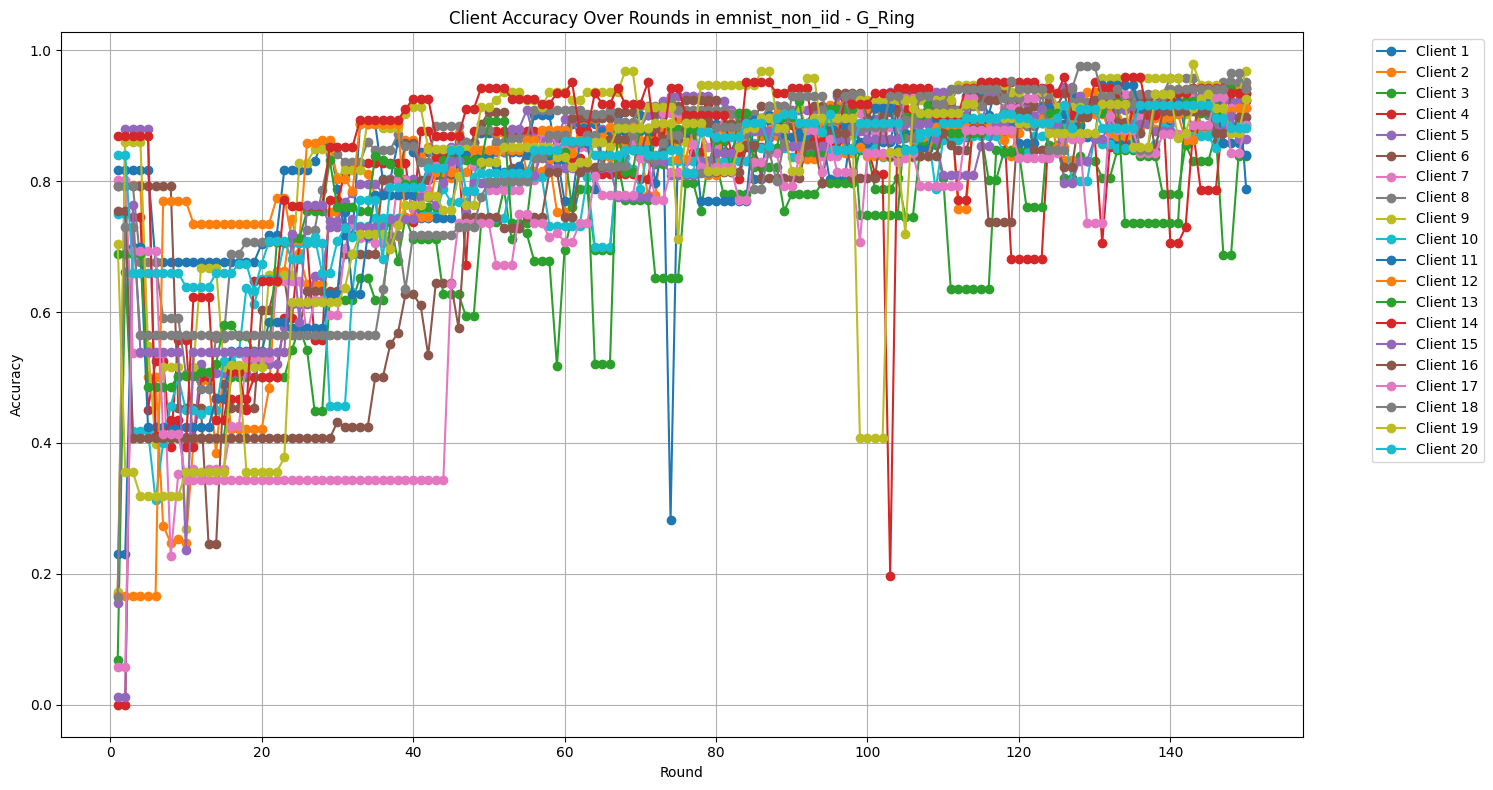

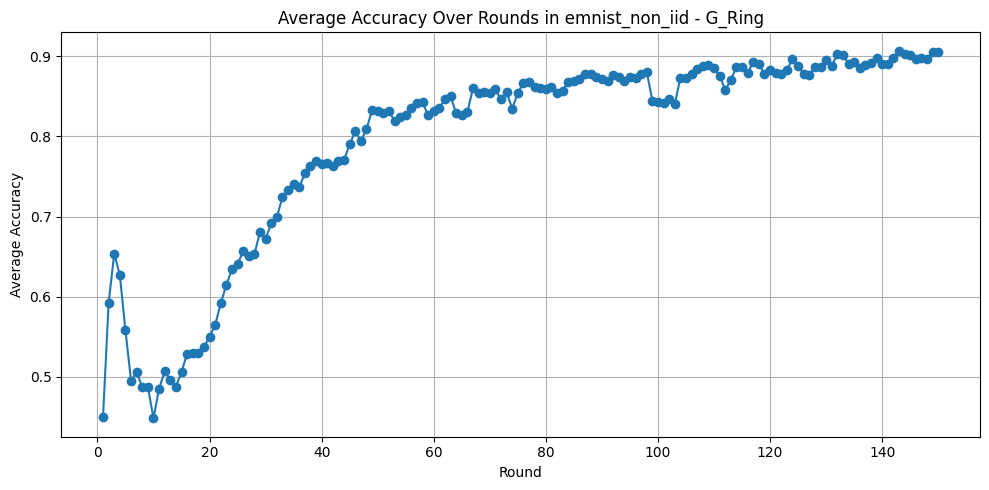

Average model accuracy on combined test dataset for emnist_non_iid - G_Ring: 0.7940


Training Rounds - emnist_non_iid - G_Line: 100%|██████████| 150/150 [10:13<00:00,  4.09s/it]


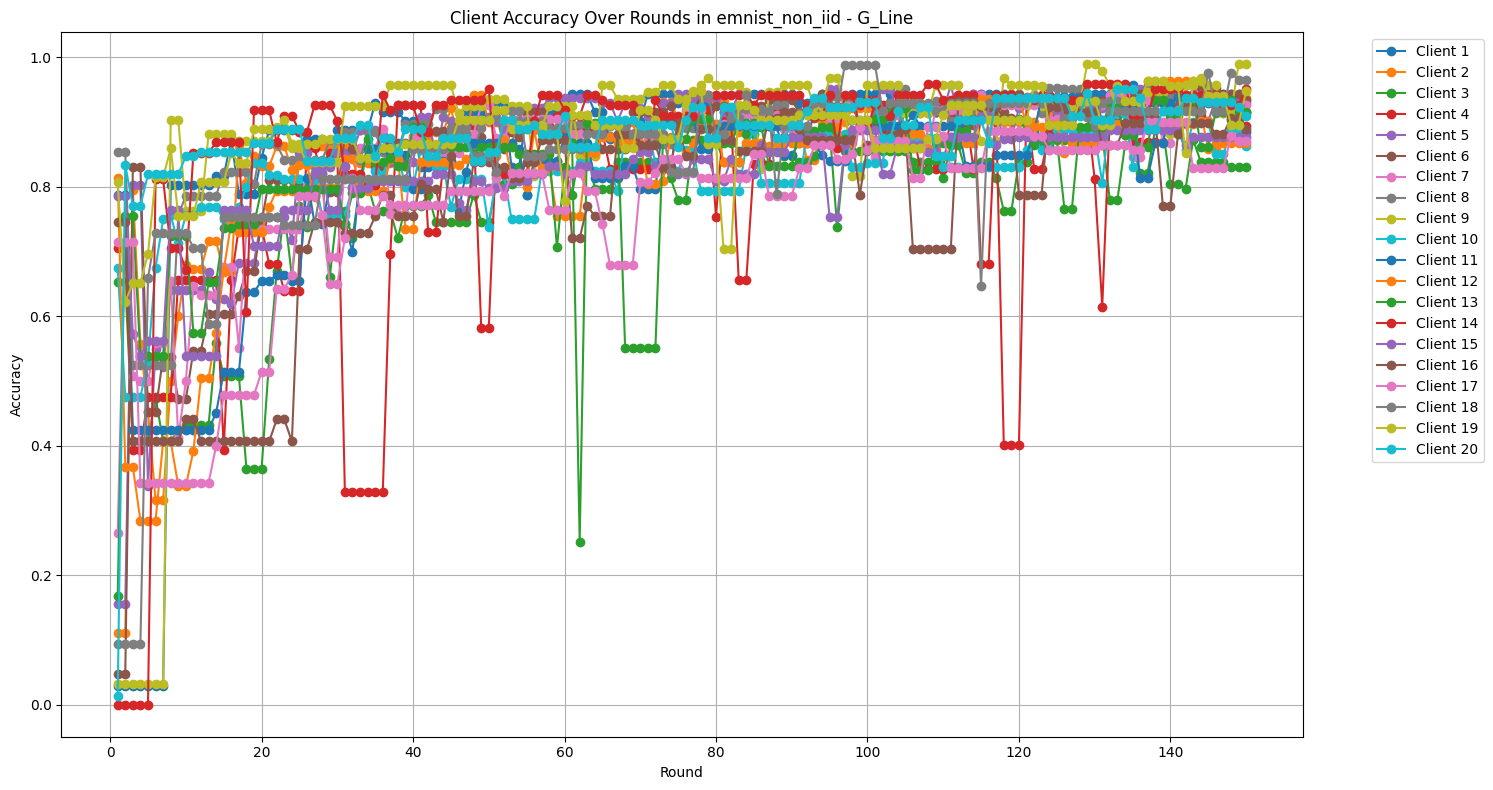

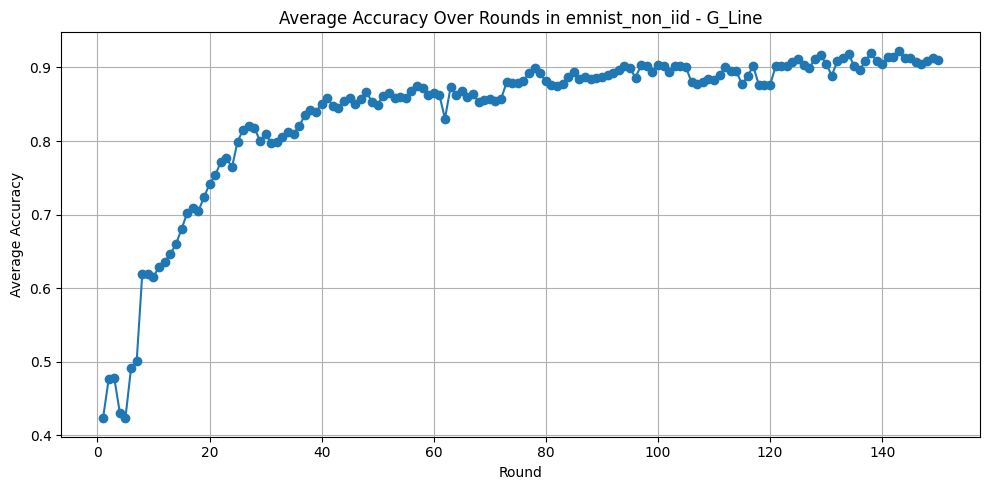

Average model accuracy on combined test dataset for emnist_non_iid - G_Line: 0.8364


Training Rounds - emnist_non_iid - G_Tree: 100%|██████████| 150/150 [10:13<00:00,  4.09s/it]


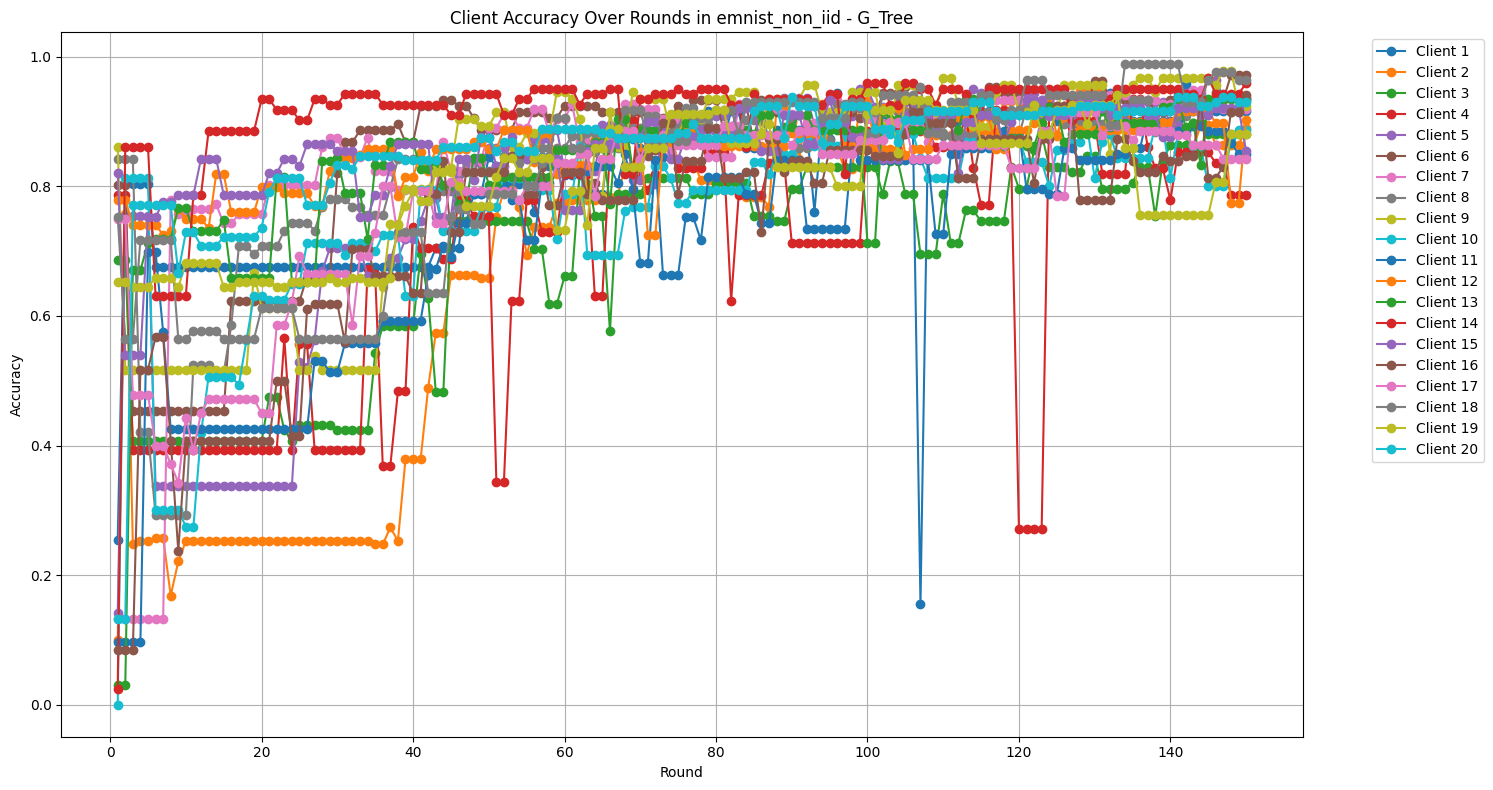

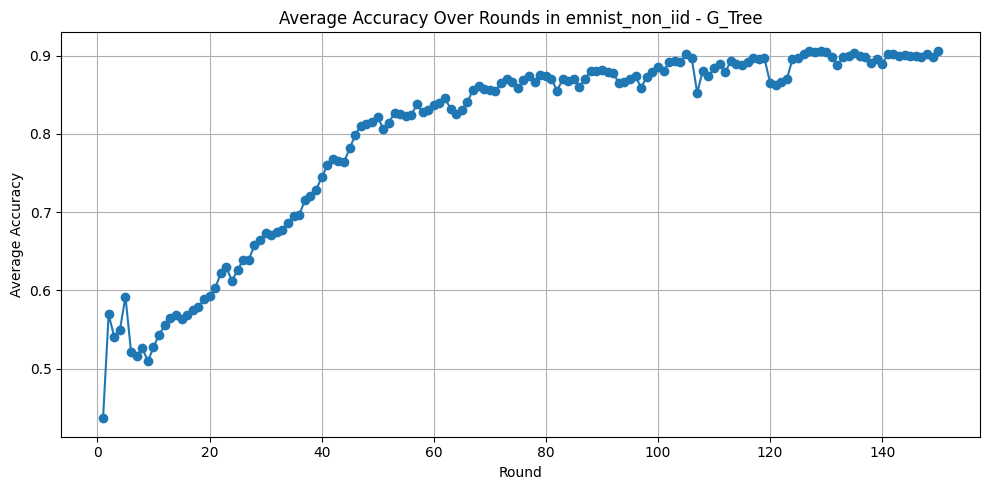

Average model accuracy on combined test dataset for emnist_non_iid - G_Tree: 0.7977


Training Rounds - emnist_non_iid - G_Star: 100%|██████████| 150/150 [10:44<00:00,  4.29s/it]


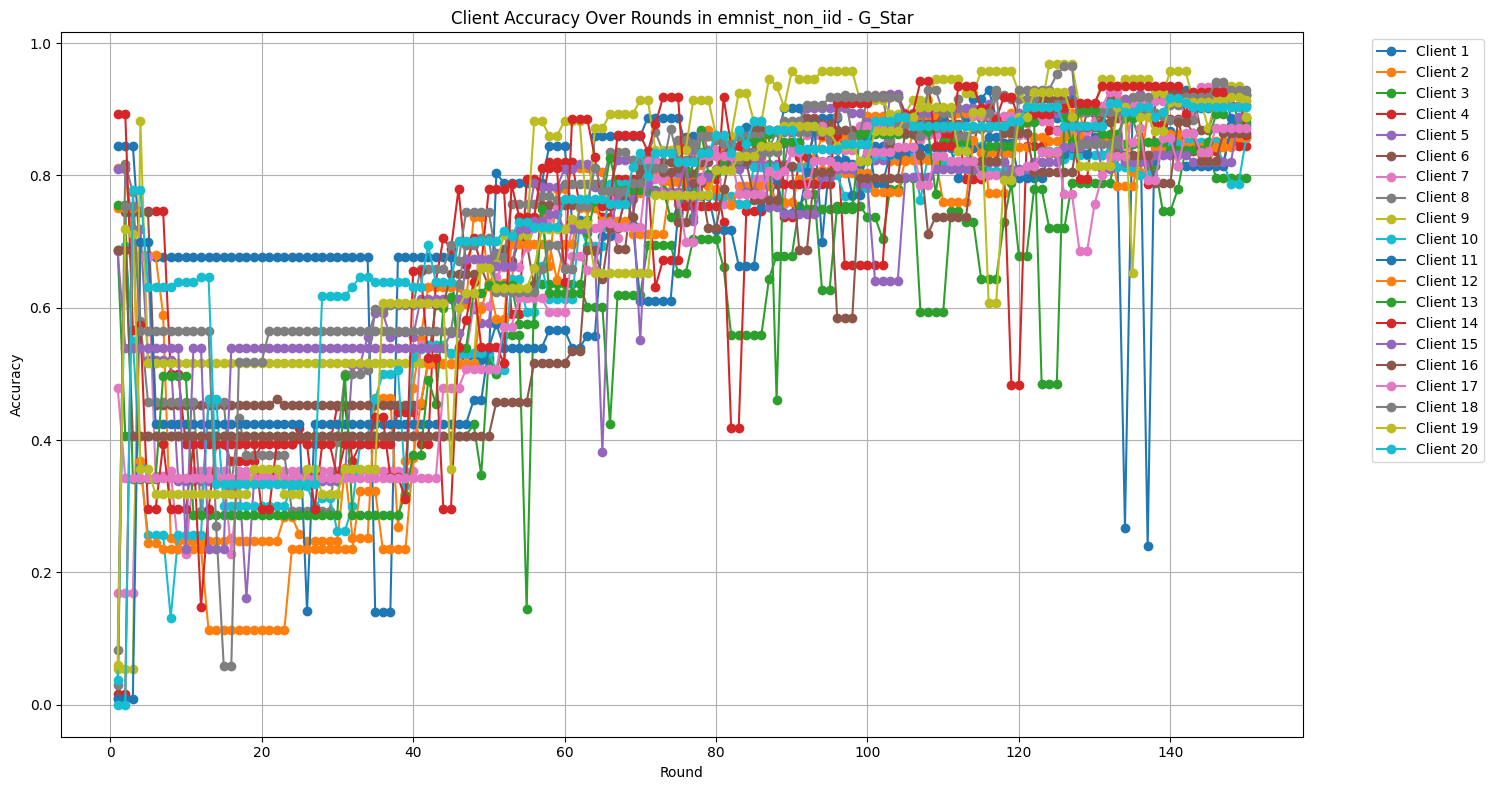

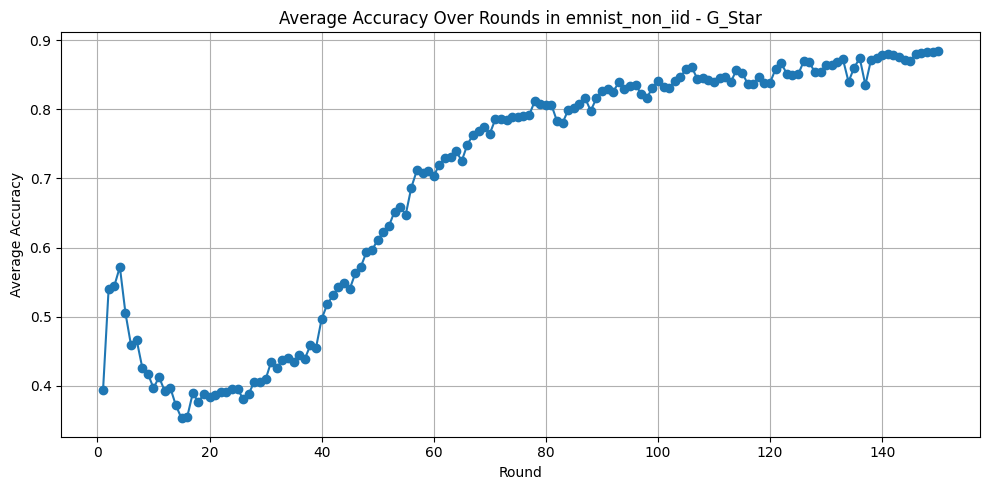

Average model accuracy on combined test dataset for emnist_non_iid - G_Star: 0.6930


In [ ]:
# Define your experiments
methodB_experiments = [
    # {
    #     'train_loaders': emnist_train_iid_loaders,
    #     'test_loaders': emnist_test_iid_loaders,
    #     'combined_test_loader': emnist_test_iid_loader,
    #     'Net': NetA,
    #     'experiment_name': 'emnist_iid'
    # },
    {
        'train_loaders': emnist_train_non_iid_loaders,
        'test_loaders': emnist_test_non_iid_loaders,
        'combined_test_loader': emnist_test_non_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_non_iid'
    }
]

# Network topologies
# topologies = [G_Tree, G_Star, G_Hybrid]
topologies = [G_Mesh_05, G_Ring, G_Line, G_Tree, G_Star]
topology_names = ["G_Mesh_05", "G_Ring", "G_Line", "G_Tree", "G_Star"]

# Run all experiments
for experiment in methodB_experiments:
    for i in range(len(topologies)):
        topology = topologies[i]
        topology_name = topology_names[i]
        if experiment.get('experiment_name') == 'emnist_iid' and i < 4:
            continue  # Skip this combination
        run_experiment_methodB(
            G=topology,
            Net=experiment['Net'],
            train_loaders=experiment['train_loaders'],
            test_loaders=experiment['test_loaders'],
            combined_test_loader=experiment['combined_test_loader'],
            experiment_name=experiment['experiment_name'],
            topology_name=topology_name,
            p=0.5
        )

## Method C

In [ ]:
def run_experiment_methodC(
    G, Net, train_loaders, test_loaders, combined_test_loader, experiment_name, topology_name, p
):
    """Perform decentralized federated learning using Method C for client selection."""
    num_clients = len(train_loaders)  # Assuming train_loaders is a list of loaders for each client
    nets = [Net().to(DEVICE) for _ in range(num_clients)]

    accuracy_history = np.zeros((num_clients, NUM_ROUNDS))
    accuracies = []
    selected_clients_history = []
    selected_clients_df = pd.DataFrame()
    probability_df = pd.DataFrame()
    accuracy_df = pd.DataFrame()

    for round_num in tqdm(range(NUM_ROUNDS), desc=f"Training Rounds - {experiment_name} - {topology_name}"):
        sample_size = int(p * num_clients)
        new_nets = [copy.deepcopy(net) for net in nets]

        if round_num == 0:
            selected_clients = np.random.choice(range(num_clients), size=sample_size, replace=False).tolist()
            round_probabilities = {f"Client {cid + 1}": p for cid in range(num_clients)}
            # Initialize the accuracy history for the first round
            accuracy_history[:, round_num] = [test(net, test_loaders[client])[1] for client, net in enumerate(nets)]
        else:
            round_probabilities = {}
            selected_clients = []

            for client in range(num_clients):
                if client in selected_clients_history[-1]:
                    last_round_accuracy = accuracy_history[client, round_num - 1]
                    prob = np.exp(-1.5 * last_round_accuracy)
                else:
                    prob = probability_df[f"Client {client + 1}"].iloc[-1]

                round_probabilities[f"Client {client + 1}"] = prob

                if np.random.rand() < prob:
                    selected_clients.append(client)

            if not selected_clients:
                selected_clients.append(np.random.randint(num_clients))

        selected_clients_history.append(selected_clients)

        for client in selected_clients:
            train(nets[client], train_loaders[client], epochs=1)
            neighbors = list(G.neighbors(client)) + [client]
            neighbor_models = [nets[n].state_dict() for n in neighbors]

            averaged_state_dict = neighbor_models[0]
            for key in averaged_state_dict:
                averaged_state_dict[key] = torch.stack([neighbor_model[key] for neighbor_model in neighbor_models], 0).mean(0)

            new_nets[client].load_state_dict(averaged_state_dict)
            _, accuracy = test(nets[client], test_loaders[client])
            accuracy_history[client, round_num] = accuracy

        nets = new_nets
        prob_df = pd.DataFrame(round_probabilities, index=[round_num + 1])
        probability_df = pd.concat([probability_df, prob_df])

        # Replace zeros in round_accuracies with the previous round's accuracy
        round_accuracies = accuracy_history[:, round_num]
        if round_num > 0:
            previous_round_accuracies = accuracy_history[:, round_num - 1]
            round_accuracies[round_accuracies == 0] = previous_round_accuracies[round_accuracies == 0]

        # Record the corrected accuracies for this round
        round_df = pd.DataFrame({f"Client {i + 1}": round_accuracies[i] for i in range(num_clients)}, index=[round_num + 1])
        accuracy_df = pd.concat([accuracy_df, round_df])

        # Calculate and record the average accuracy for this round
        average_accuracy = np.nanmean(round_accuracies)
        accuracies.append(average_accuracy)

        # Record selected clients for this round
        selected_dict = {f'Client {i + 1}': 1 if i in selected_clients else 0 for i in range(num_clients)}
        selected_clients_df = pd.concat([selected_clients_df, pd.DataFrame(selected_dict, index=[round_num + 1])])

    # Calculate the average model accuracy using the average model state
    average_state_dict = nets[0].state_dict()
    for key in average_state_dict:
        average_state_dict[key] = torch.stack([net.state_dict()[key] for net in nets], 0).mean(0)

    average_model = Net().to(DEVICE)
    average_model.load_state_dict(average_state_dict)

    _, average_accuracy = test(average_model, combined_test_loader)
    print(f'Average model accuracy on combined test dataset for {experiment_name} - {topology_name}: {average_accuracy:.4f}')

    # Plot average accuracy curve
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, NUM_ROUNDS + 1), accuracies)
    plt.xlabel('Round')
    plt.ylabel('Average Accuracy')
    plt.title(f'Average Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodC_{experiment_name}_{topology_name}_average_accuracy.png')
    plt.show()

    # Plot accuracy over rounds
    plt.figure(figsize=(10, 5))
    for client in range(num_clients):
        plt.plot(accuracy_history[client], label=f'Client {client}')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Client Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodC_{experiment_name}_{topology_name}_round_accuracy.png')
    plt.show()

    # Save accuracy matrix
    accuracy_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodC_{experiment_name}_{topology_name}_accuracy_matrix.csv', index_label='Round')

    # Save probability and availability matrices
    probability_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodC_{experiment_name}_{topology_name}_probabilities.csv', index_label='Round')

    # Save selected clients history to CSV
    selected_clients_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodC_{experiment_name}_{topology_name}_selected_clients.csv', index_label='Round')

    # Print final average accuracy across all rounds
    final_average_accuracy = np.nanmean(accuracies)
    print(f'Final average accuracy over all rounds for {experiment_name} - {topology_name}: {final_average_accuracy:.4f}')


Training Rounds - emnist_iid - G_Ring: 100%|██████████| 150/150 [22:40<00:00,  9.07s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Ring: 0.9539


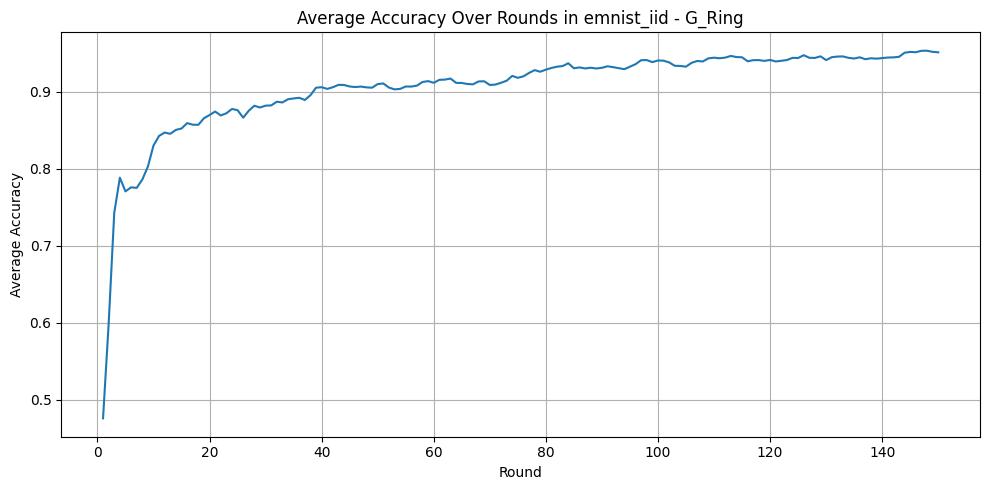

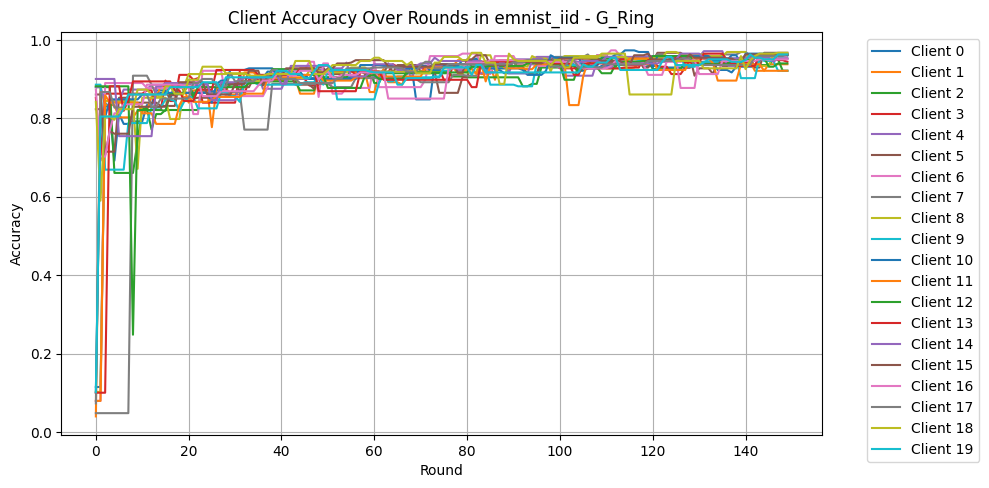

Final average accuracy over all rounds for emnist_iid - G_Ring: 0.9058


Training Rounds - emnist_iid - G_Line: 100%|██████████| 150/150 [21:44<00:00,  8.70s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Line: 0.8917


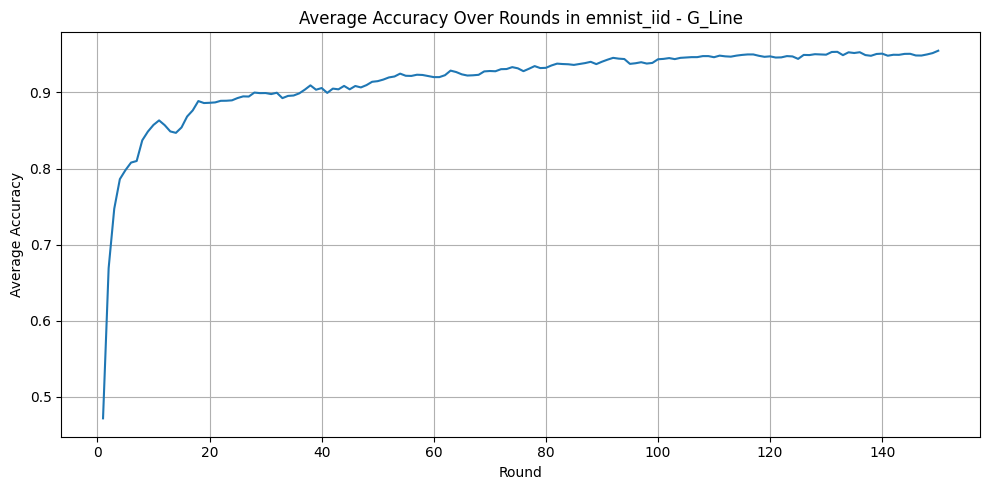

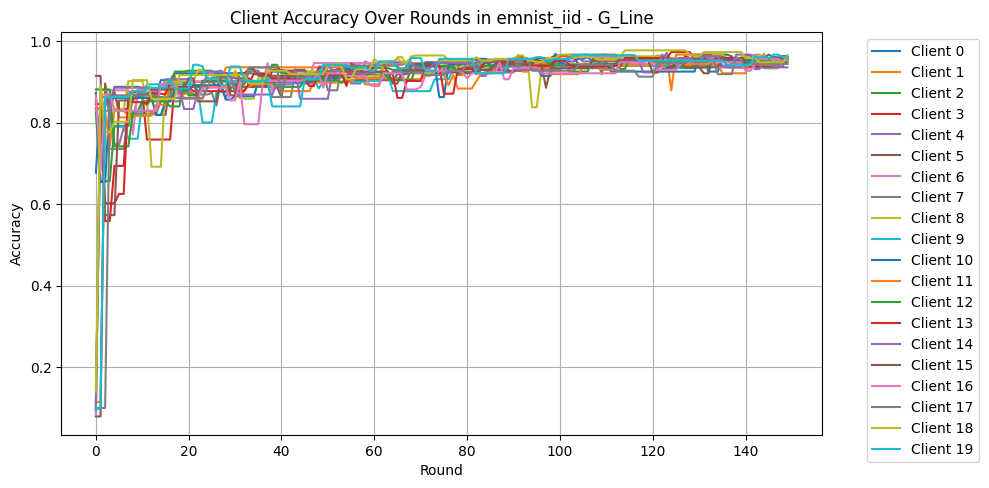

Final average accuracy over all rounds for emnist_iid - G_Line: 0.9155


Training Rounds - emnist_iid - G_Tree: 100%|██████████| 150/150 [21:21<00:00,  8.54s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Tree: 0.9514


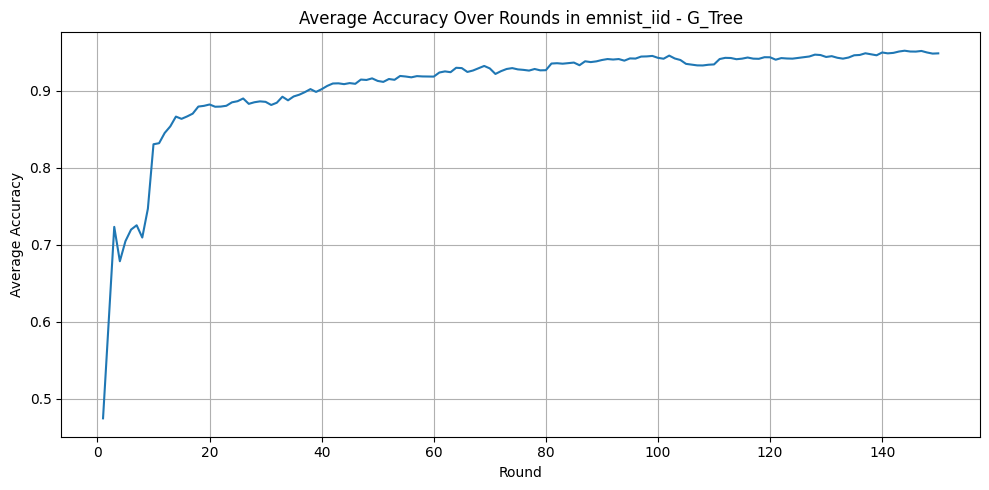

Final average accuracy over all rounds for emnist_iid - G_Tree: 0.9075


Training Rounds - emnist_iid - G_Star: 100%|██████████| 150/150 [21:56<00:00,  8.77s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Star: 0.9691


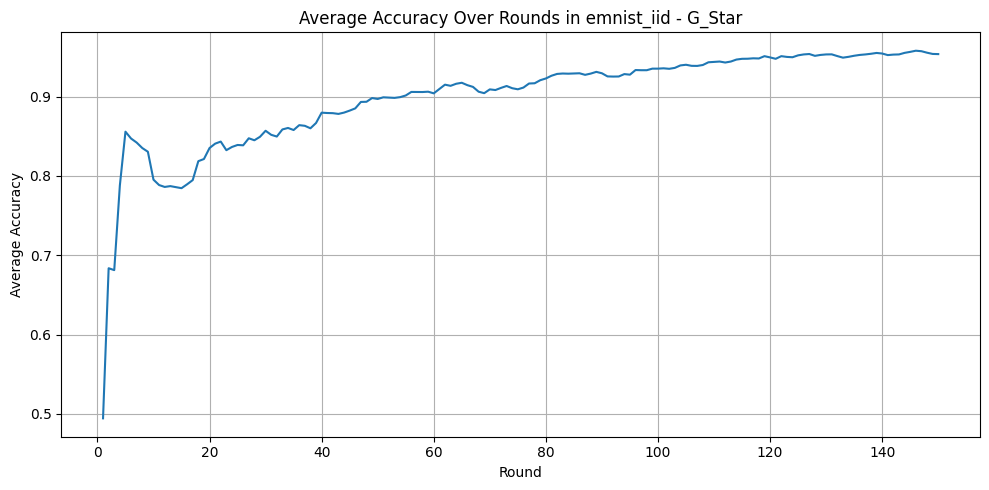

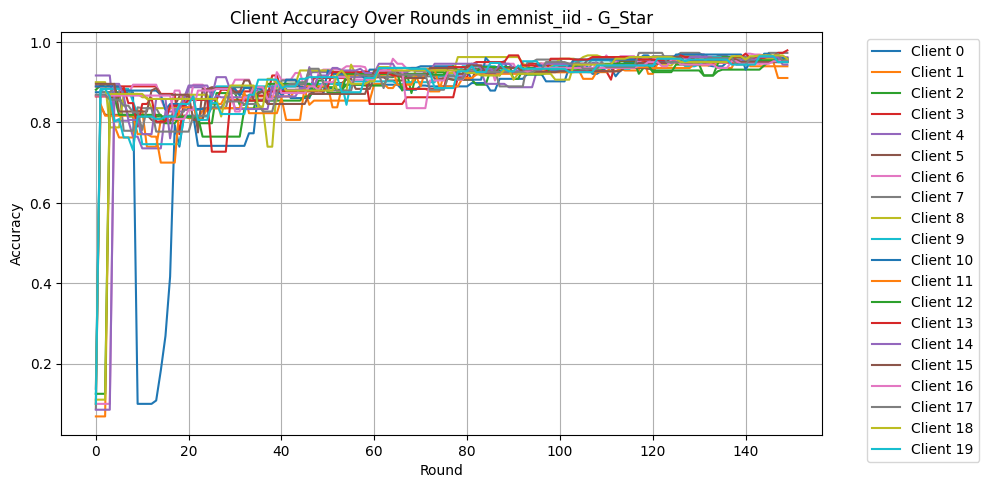

Final average accuracy over all rounds for emnist_iid - G_Star: 0.8992


Training Rounds - emnist_non_iid - G_Mesh_05: 100%|██████████| 150/150 [15:07<00:00,  6.05s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Mesh_05: 0.1462


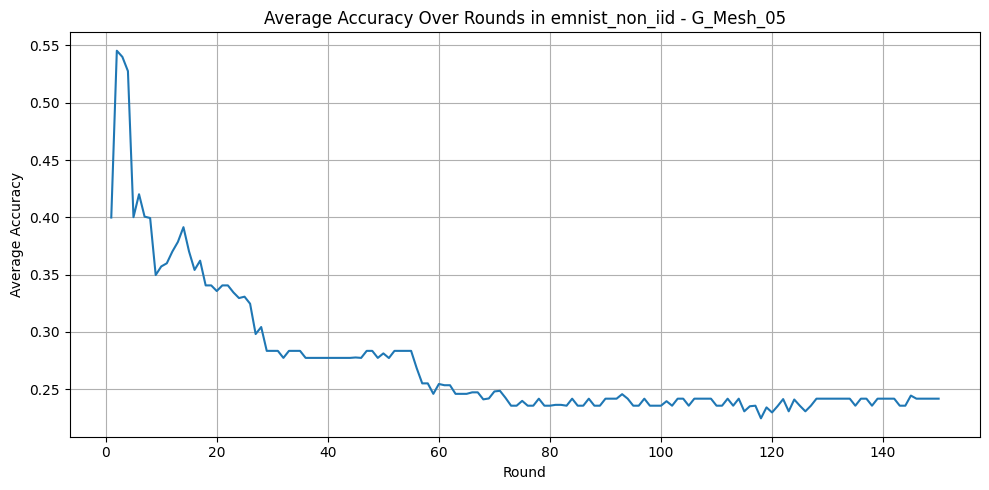

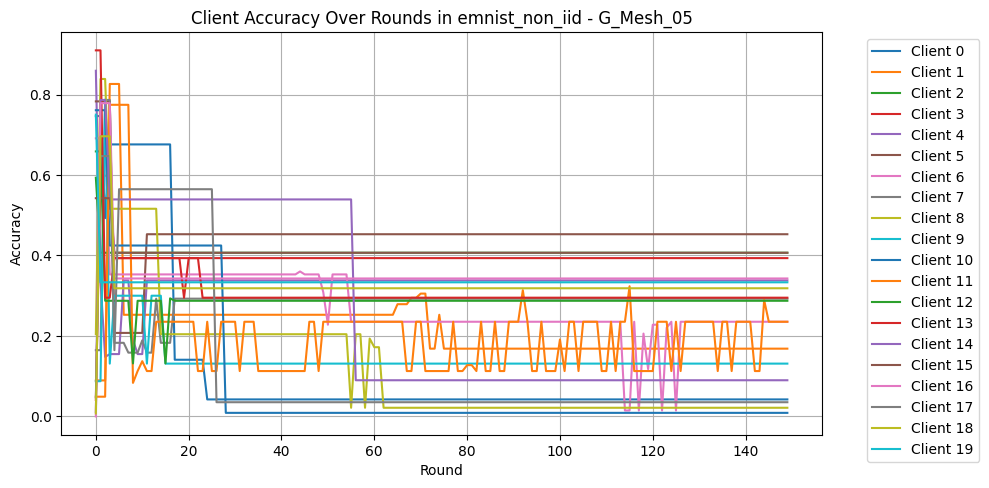

Final average accuracy over all rounds for emnist_non_iid - G_Mesh_05: 0.2730


Training Rounds - emnist_non_iid - G_Ring: 100%|██████████| 150/150 [07:19<00:00,  2.93s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Ring: 0.8385


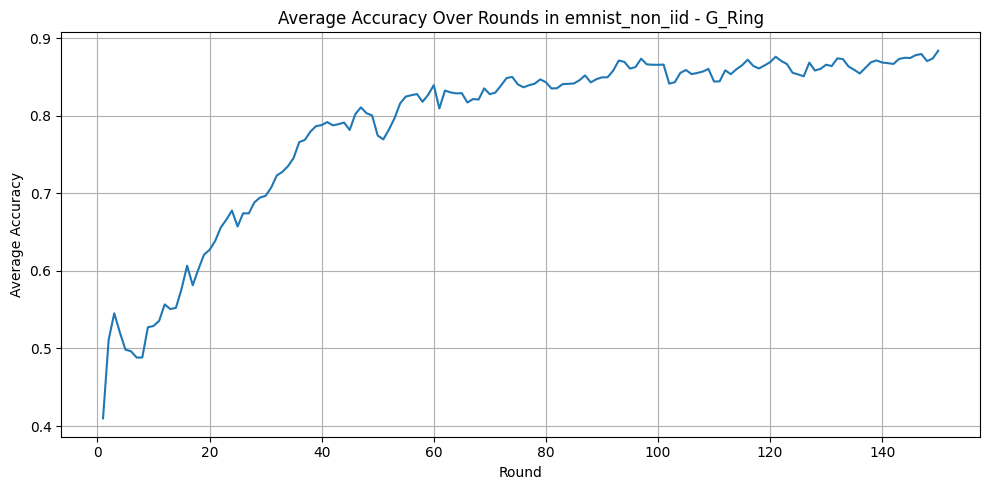

Final average accuracy over all rounds for emnist_non_iid - G_Ring: 0.7871


Training Rounds - emnist_non_iid - G_Line: 100%|██████████| 150/150 [06:56<00:00,  2.78s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Line: 0.7931


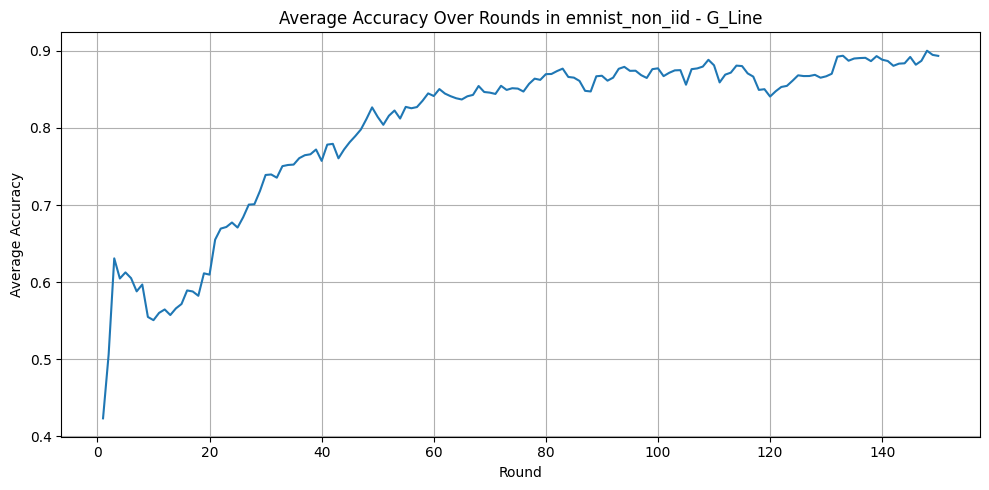

Final average accuracy over all rounds for emnist_non_iid - G_Line: 0.8013


Training Rounds - emnist_non_iid - G_Tree: 100%|██████████| 150/150 [07:14<00:00,  2.90s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Tree: 0.8297


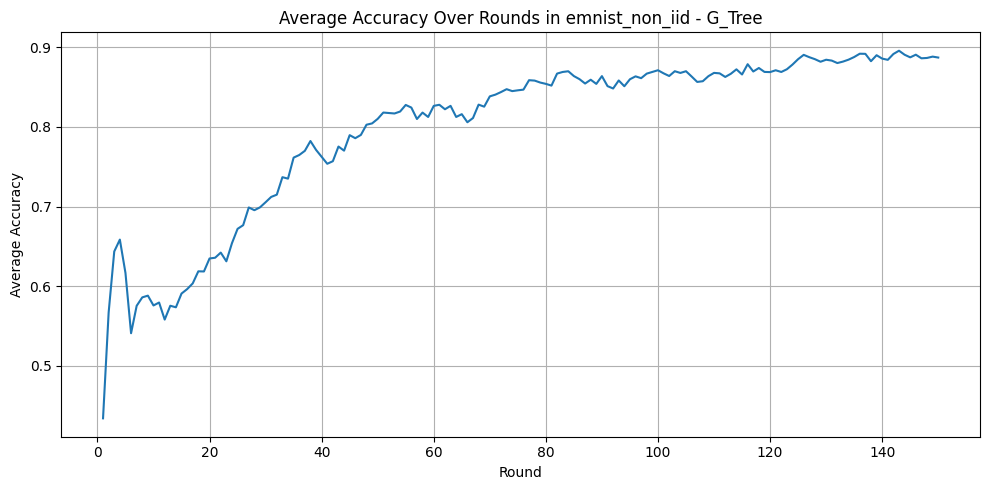

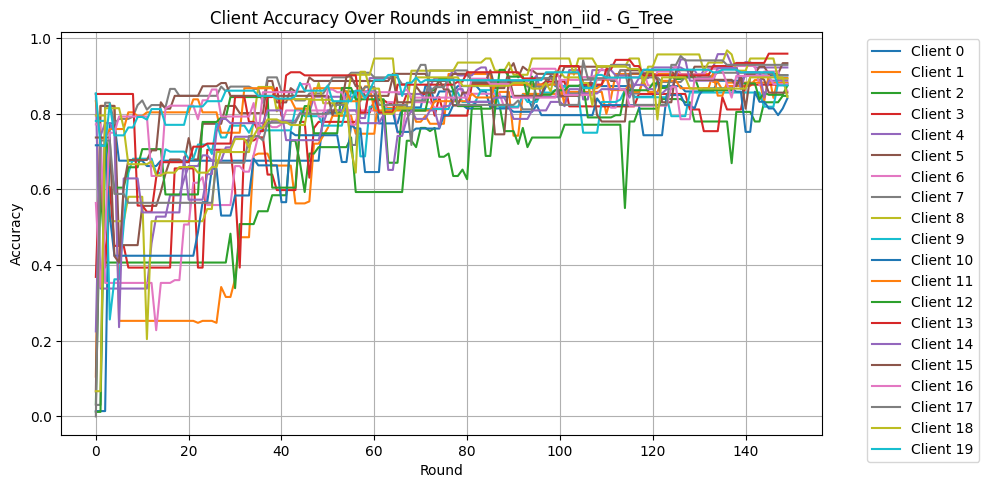

Final average accuracy over all rounds for emnist_non_iid - G_Tree: 0.7987


Training Rounds - emnist_non_iid - G_Star: 100%|██████████| 150/150 [08:24<00:00,  3.37s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Star: 0.8496


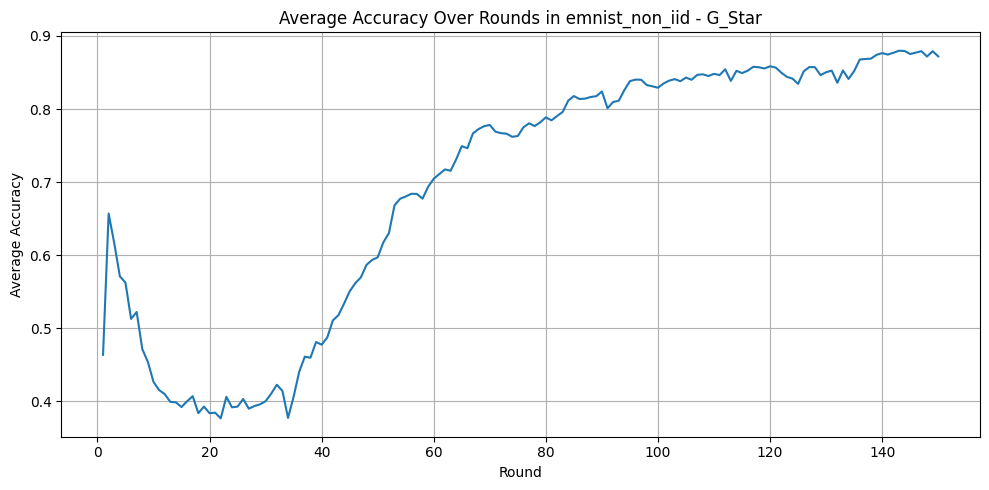

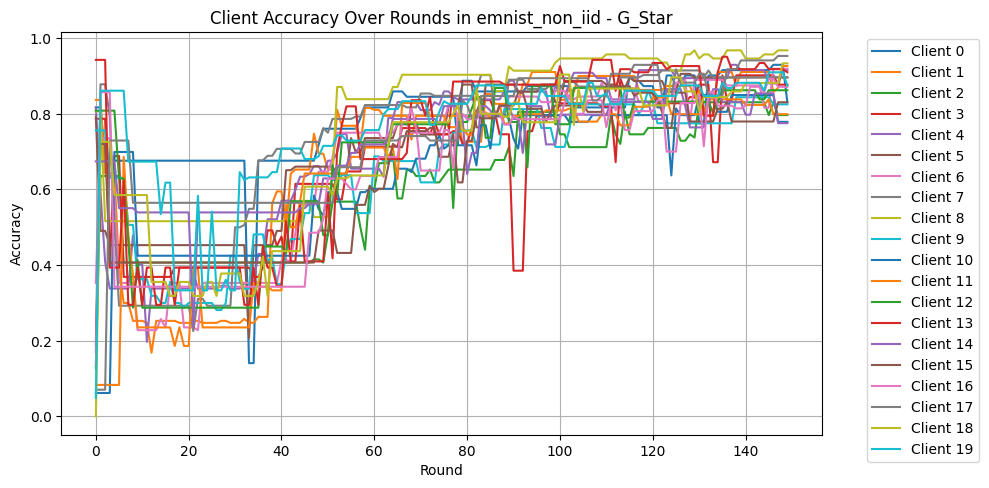

Final average accuracy over all rounds for emnist_non_iid - G_Star: 0.6939


In [ ]:
# Define your experiments
methodC_experiments = [
    {
        'train_loaders': emnist_train_iid_loaders,
        'test_loaders': emnist_test_iid_loaders,
        'combined_test_loader': emnist_test_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_iid'
    },
    {
        'train_loaders': emnist_train_non_iid_loaders,
        'test_loaders': emnist_test_non_iid_loaders,
        'combined_test_loader': emnist_test_non_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_non_iid'
    }
]

# Network topologies
# topologies = [G_Tree, G_Star, G_Hybrid]
topologies = [G_Mesh_05, G_Ring, G_Line, G_Tree, G_Star]
topology_names = ["G_Mesh_05", "G_Ring", "G_Line", "G_Tree", "G_Star"]

# Run all experiments
for experiment in methodC_experiments:
    for i in range(len(topologies)):
        topology = topologies[i]
        topology_name = topology_names[i]
        if experiment.get('experiment_name') == 'emnist_iid' and i < 1:
            continue  # Skip this combination
        run_experiment_methodC(
            G=topology,
            Net=experiment['Net'],
            train_loaders=experiment['train_loaders'],
            test_loaders=experiment['test_loaders'],
            combined_test_loader=experiment['combined_test_loader'],
            experiment_name=experiment['experiment_name'],
            topology_name=topology_name,
            p=0.5
        )

## Method D

In [ ]:
def run_experiment_methodD(
    G, Net, train_loaders, test_loaders, combined_test_loader, experiment_name, topology_name, p
):
    """Perform decentralized federated learning with Method D and evaluate performance."""
    num_clients = len(train_loaders)  # Assuming train_loaders is a list of loaders for each client

    # Initialize the network for each client
    nets = [Net().to(DEVICE) for _ in range(num_clients)]

    # Initialize states and probabilities
    states = {f"Client {i + 1}": "ON" for i in range(num_clients)}
    p1_dict = {f"Client {i + 1}": np.random.uniform() for i in range(num_clients)}
    p2_dict = {f"Client {i + 1}": np.random.uniform() for i in range(num_clients)}

    accuracy_history = np.zeros((num_clients, NUM_ROUNDS))
    probability_df = pd.DataFrame()
    availability_df = pd.DataFrame()
    selection_history_df = pd.DataFrame()  # DataFrame to store selection history

    accuracies = []

    for round_num in tqdm(range(NUM_ROUNDS), desc=f"Training Rounds - {experiment_name} - {topology_name}"):
        new_nets = [copy.deepcopy(net) for net in nets]  # Deep copy the models to avoid in-place modifications

        selected_clients = []
        round_probabilities = {}
        round_selection = {}

        # State transition
        for client_cid in range(num_clients):
            client_key = f"Client {client_cid + 1}"
            if states[client_key] == "ON":
                if np.random.rand() <= p1_dict[client_key]:
                    states[client_key] = "OFF"
            elif states[client_key] == "OFF":
                if np.random.rand() <= p2_dict[client_key]:
                    states[client_key] = "ON"

        # Training clients
        for client_cid in range(num_clients):
            client_key = f"Client {client_cid + 1}"
            if states[client_key] == "ON":
                if round_num == 0:
                    prob = p
                else:
                    prob = round_probabilities.get(client_key, np.exp(-1.5 * accuracy_history[client_cid, round_num - 1]))

                round_probabilities[client_key] = prob
                round_selection[client_key] = 1 if np.random.rand() < prob else 0

                if round_selection[client_key] == 1:
                    selected_clients.append(client_cid)

        # Ensure at least one client is selected
        if not selected_clients:
            selected_clients.append(random.randint(0, num_clients - 1))

        # Train selected clients
        for client_cid in selected_clients:
            train(nets[client_cid], train_loaders[client_cid], epochs=1)

        # Aggregate models
        aggregated_state_dict = nets[0].state_dict()
        for key in aggregated_state_dict:
            aggregated_state_dict[key] = torch.stack([net.state_dict()[key] for net in nets], 0).mean(0)

        # Update new models
        for net in new_nets:
            net.load_state_dict(aggregated_state_dict)

        # Evaluate models and store accuracy
        for client_cid in selected_clients:
            _, accuracy = test(nets[client_cid], test_loaders[client_cid])
            accuracy_history[client_cid, round_num] = accuracy

        # Replace zeros in accuracy_history with the previous round's accuracy
        if round_num > 0:
            accuracy_history[:, round_num] = np.where(
                accuracy_history[:, round_num] == 0,
                accuracy_history[:, round_num - 1],
                accuracy_history[:, round_num]
            )

        # Update probability and availability dataframes
        prob_df = pd.DataFrame(round_probabilities, index=[round_num])
        probability_df = pd.concat([probability_df, prob_df])

        availability_dict = {f"Client {i + 1}": 1 if states[f"Client {i + 1}"] == "ON" else 0 for i in range(num_clients)}
        avail_df = pd.DataFrame(availability_dict, index=[round_num])
        availability_df = pd.concat([availability_df, avail_df])

        # Record selection history
        selection_history_df = pd.concat([selection_history_df, pd.DataFrame(round_selection, index=[round_num])])

        # Record and calculate the average accuracy for this round
        round_accuracies = accuracy_history[:, round_num]
        average_accuracy = np.nanmean(round_accuracies)
        accuracies.append(average_accuracy)

    # Compute average model parameters
    average_state_dict = nets[0].state_dict()
    for key in average_state_dict:
        average_state_dict[key] = torch.stack([net.state_dict()[key] for net in nets], 0).mean(0)

    # Load average parameters into a new model
    average_model = Net().to(DEVICE)
    average_model.load_state_dict(average_state_dict)

    # Test the average model on the combined test dataset
    _, average_accuracy = test(average_model, combined_test_loader)
    print(f'Average model accuracy on combined test dataset for {experiment_name} - {topology_name}: {average_accuracy:.4f}')

    # Plot accuracy over rounds
    plt.figure(figsize=(10, 5))
    for client_cid in range(num_clients):
        plt.plot(accuracy_history[client_cid], label=f'Client {client_cid + 1}')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Client Accuracy Over Rounds in {experiment_name} - {topology_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_accuracy.png')
    plt.show()

    # Save accuracy to CSV
    df_accuracy = pd.DataFrame(accuracy_history.T, columns=[f'Client {i + 1}' for i in range(num_clients)])
    df_accuracy.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_accuracy.csv', index_label='Round')

    # Save probability and availability matrices
    probability_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_probability.csv', index_label='Round')
    availability_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_availability.csv', index_label='Round')

    # Save p1 and p2 dicts to CSV
    p1_df = pd.DataFrame(p1_dict.items(), columns=['Client', 'p1'])
    p2_df = pd.DataFrame(p2_dict.items(), columns=['Client', 'p2'])
    p1_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_p1.csv', index=False)
    p2_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_p2.csv', index=False)

    # Save client selection history to CSV
    selection_history_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/graduation project/Week10/MethodD_{experiment_name}_{topology_name}_selection_history.csv', index_label='Round')

    # Print final average accuracy across all rounds
    final_average_accuracy = np.nanmean(accuracies)
    print(f'Final average accuracy over all rounds for {experiment_name} - {topology_name}: {final_average_accuracy:.4f}')


Training Rounds - emnist_iid - G_Mesh_05: 100%|██████████| 150/150 [08:04<00:00,  3.23s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Mesh_05: 0.1000


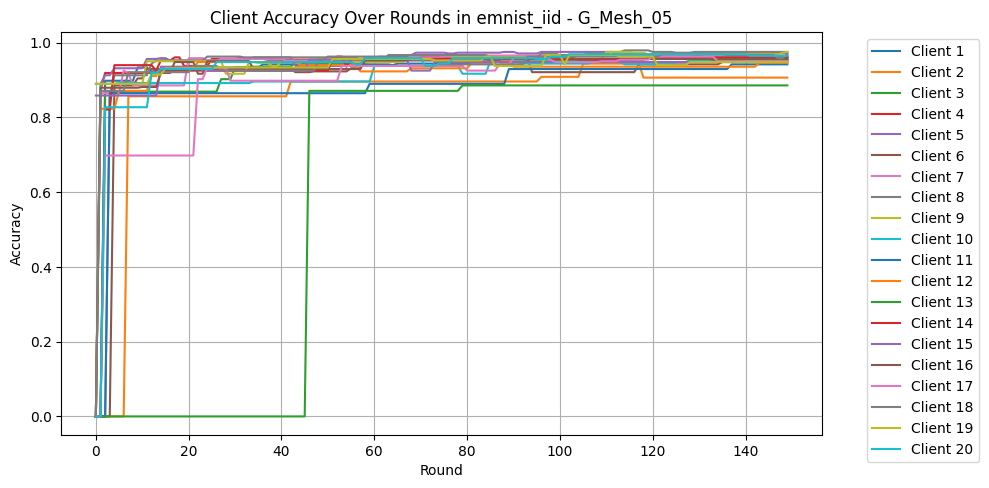

Final average accuracy over all rounds for emnist_iid - G_Mesh_05: 0.9105


Training Rounds - emnist_iid - G_Ring: 100%|██████████| 150/150 [09:25<00:00,  3.77s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Ring: 0.1000


Final average accuracy over all rounds for emnist_iid - G_Ring: 0.8984


Training Rounds - emnist_iid - G_Line: 100%|██████████| 150/150 [10:52<00:00,  4.35s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Line: 0.1000


Final average accuracy over all rounds for emnist_iid - G_Line: 0.9259


Training Rounds - emnist_iid - G_Tree: 100%|██████████| 150/150 [12:59<00:00,  5.20s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Tree: 0.1000


Final average accuracy over all rounds for emnist_iid - G_Tree: 0.9412


Training Rounds - emnist_iid - G_Star: 100%|██████████| 150/150 [11:04<00:00,  4.43s/it]


Average model accuracy on combined test dataset for emnist_iid - G_Star: 0.1000


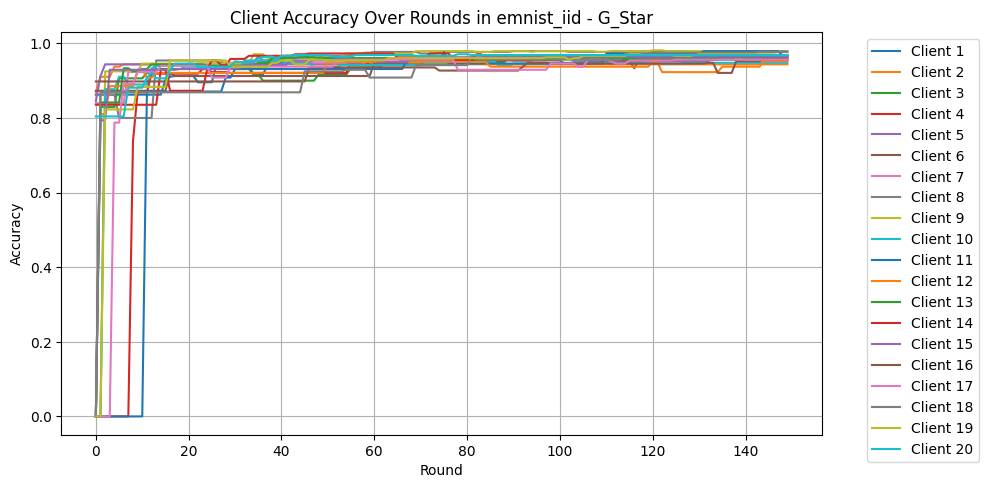

Final average accuracy over all rounds for emnist_iid - G_Star: 0.9337


Training Rounds - emnist_non_iid - G_Mesh_05: 100%|██████████| 150/150 [03:09<00:00,  1.26s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Mesh_05: 0.0794


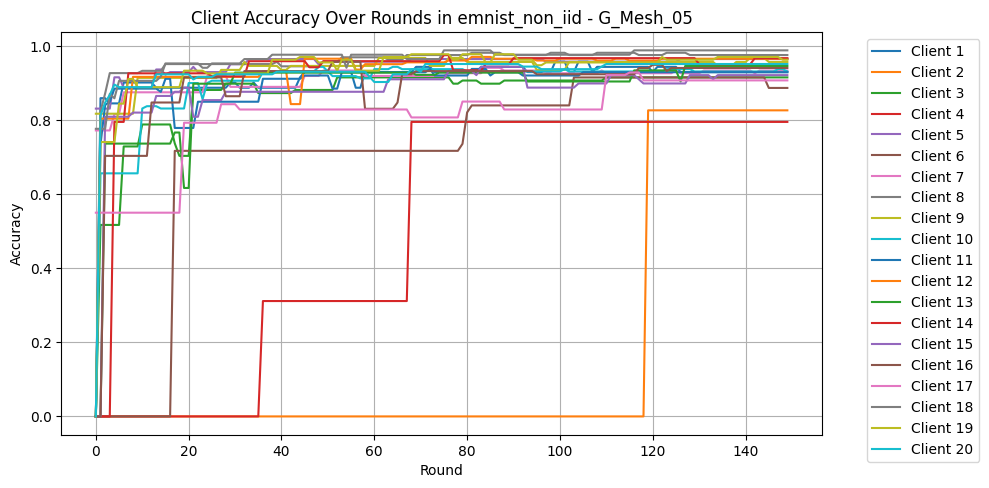

Final average accuracy over all rounds for emnist_non_iid - G_Mesh_05: 0.8451


Training Rounds - emnist_non_iid - G_Ring: 100%|██████████| 150/150 [03:17<00:00,  1.32s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Ring: 0.0794


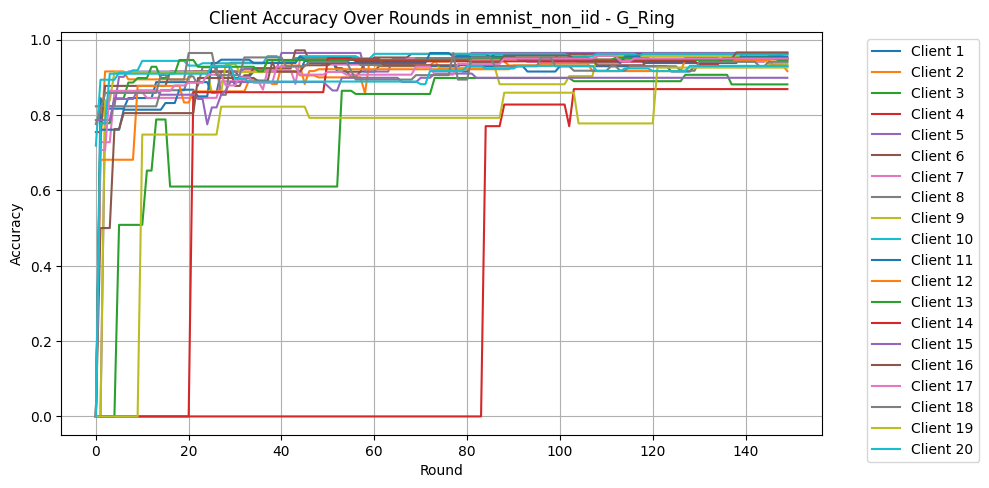

Final average accuracy over all rounds for emnist_non_iid - G_Ring: 0.8700


Training Rounds - emnist_non_iid - G_Line: 100%|██████████| 150/150 [02:48<00:00,  1.12s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Line: 0.0722


Final average accuracy over all rounds for emnist_non_iid - G_Line: 0.8855


Training Rounds - emnist_non_iid - G_Tree: 100%|██████████| 150/150 [02:52<00:00,  1.15s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Tree: 0.0722


Final average accuracy over all rounds for emnist_non_iid - G_Tree: 0.8888


Training Rounds - emnist_non_iid - G_Star: 100%|██████████| 150/150 [03:26<00:00,  1.38s/it]


Average model accuracy on combined test dataset for emnist_non_iid - G_Star: 0.0794


Final average accuracy over all rounds for emnist_non_iid - G_Star: 0.8835


In [ ]:
# Define your experiments
methodC_experiments = [
    {
        'train_loaders': emnist_train_iid_loaders,
        'test_loaders': emnist_test_iid_loaders,
        'combined_test_loader': emnist_test_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_iid'
    },
    {
        'train_loaders': emnist_train_non_iid_loaders,
        'test_loaders': emnist_test_non_iid_loaders,
        'combined_test_loader': emnist_test_non_iid_loader,
        'Net': NetA,
        'experiment_name': 'emnist_non_iid'
    }
]

# Network topologies
# topologies = [G_Tree, G_Star, G_Hybrid]
topologies = [G_Mesh_05, G_Ring, G_Line, G_Tree, G_Star]
topology_names = ["G_Mesh_05", "G_Ring", "G_Line", "G_Tree", "G_Star"]

# Run all experiments
for experiment in methodC_experiments:
    for i in range(len(topologies)):
        topology = topologies[i]
        topology_name = topology_names[i]
        run_experiment_methodD(
            G=topology,
            Net=experiment['Net'],
            train_loaders=experiment['train_loaders'],
            test_loaders=experiment['test_loaders'],
            combined_test_loader=experiment['combined_test_loader'],
            experiment_name=experiment['experiment_name'],
            topology_name=topology_name,
            p=0.5
        )